In [1]:
%load_ext autoreload
%autoreload 2
import sys
from os import path
import os

sys.path.insert(0, "../../ISANet/")
sys.path.insert(0, "./")

from isanet.neural_network import MLPRegressor
from isanet.model import Mlp
from isanet.optimizer import SGD
from isanet.utils.model_utils import printMSE, printAcc, plotMse, save_data, load_data
from isanet.optimizer import EarlyStopping
from isanet.model_selection import Kfold, GridSearchCV
from isanet.metrics import mse, mee, accuracy_binary
from isanet.datasets.monk import load_monk

import numpy as np
import time
import datetime
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def plotCup(history, name="."):
    plt.plot(history["loss_mse"])
    plt.plot(history["val_loss_mse"], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("momentum_img/"+name+"_all.eps")
    plt.show()

def plotCupCut(history, cut= 100, name="."):
    plt.plot(history["loss_mse"][cut:])
    plt.plot(history["val_loss_mse"][cut:], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.xlim(left = cut)
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("momentum_img/"+name+"_end.eps")
    plt.show()

def plotCupCutUnder(history, cut= 100, name="."):
    plt.plot(history["loss_mse"][:cut])
    plt.plot(history["val_loss_mse"][:cut], linestyle='--')
    plt.title('MSE')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.grid()
    plt.legend(['Training', 'Validation'], loc='upper right', fontsize='large')
    plt.tight_layout()
    if name != ".":
        plt.savefig("momentum_img/"+name+"_start.eps")
    plt.show()

In [3]:
dataset = np.genfromtxt('../dataset/cup10/ML-CUP19-TR_tr_vl_10.csv',delimiter=',')
print("Dim dataset train+val: {}".format(dataset.shape))
X_train = dataset[:1275,:-2] # 85%
Y_train = dataset[:1275,-2:]
    
X_val = dataset[1275:,:-2]   # 15%
Y_val = dataset[1275:,-2:]

print("Dim train set: {}".format(X_train.shape))
print("Dim val set: {}".format(X_val.shape))

Dim dataset train+val: (1500, 12)
Dim train set: (1275, 10)
Dim val set: (225, 10)


# instability with large learning rate

MSE train: 4.19413701654776 
MSE val: 5.764902275149154 


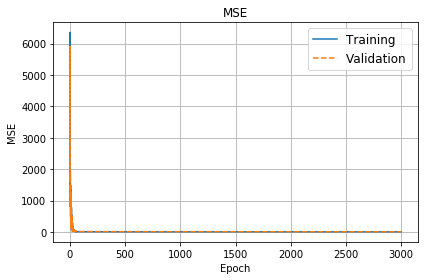

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


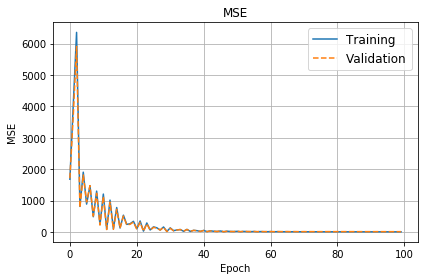

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


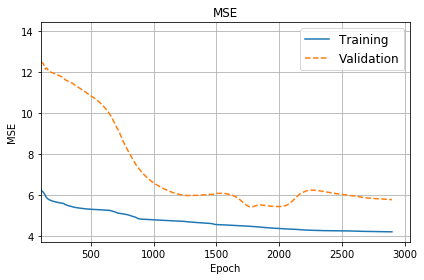

In [25]:
np.random.seed(42)
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.3,
            #"momentum": 0.9,
            "nesterov": False,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 3000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history(), name="cup_instability")
plotCupCut(model.get_history(), name="cup_instability")

# no momentum

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


MSE train: 2.5101098433928493 
MSE val: 2.6121749197549717 


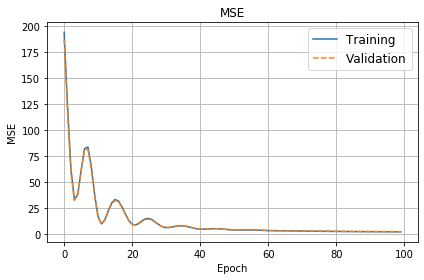

In [14]:
np.random.seed(42)
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.01,
            #"momentum": 0.9,
            "nesterov": False,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 100
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

#plotCup(model.get_history())
plotCupCutUnder(model.get_history(), name="cup_no_momentum")
#plotCupCut(model.get_history())

# Momentum

MSE train: 2.5101098433928493 
MSE val: 2.6121749197549717 


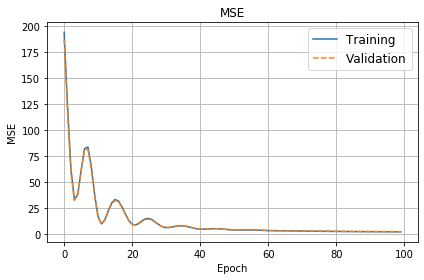

In [6]:
np.random.seed(42)

param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.01,
            "momentum": 0.9,
            "nesterov": False,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 100
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

#plotCup(model.get_history())
plotCupCutUnder(model.get_history())
#plotCupCut(model.get_history())

# Nesterov

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


MSE train: 2.5340418507820877 
MSE val: 2.5168082217243573 


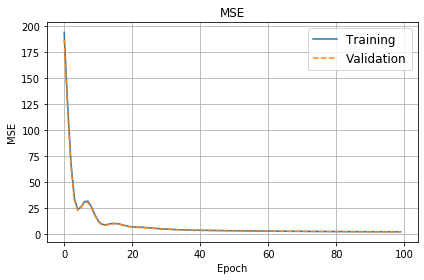

In [11]:
np.random.seed(42)

param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.01,
            "momentum": 0.9,
            "nesterov": True,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 100
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

#plotCup(model.get_history())
plotCupCutUnder(model.get_history(), name="cup_with_nesterov")
#plotCupCut(model.get_history())

# Super-accelerated Nesterov

MSE train: 0.755939061257958 
MSE val: 0.9742866944400264 


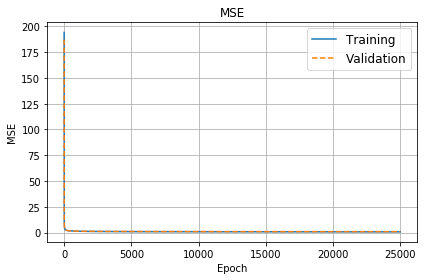

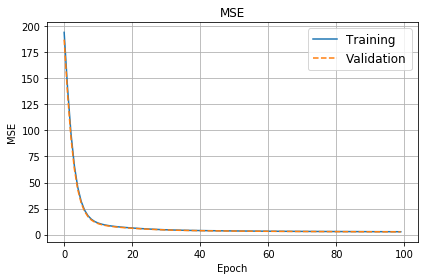

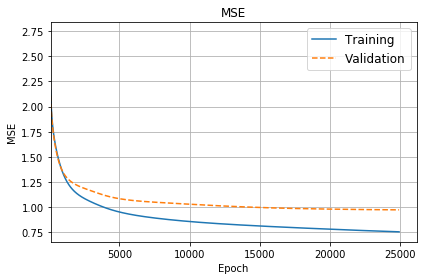

In [7]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.01,
            "momentum": 0.9,
            "nesterov": True,
            "sigma": 4,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

MSE train: 0.7521502017197524 
MSE val: 0.9687060063909088 


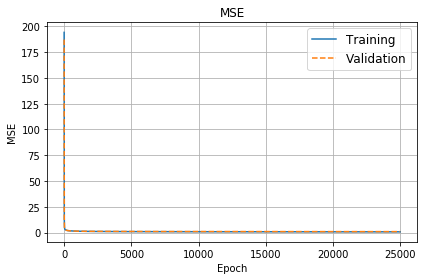

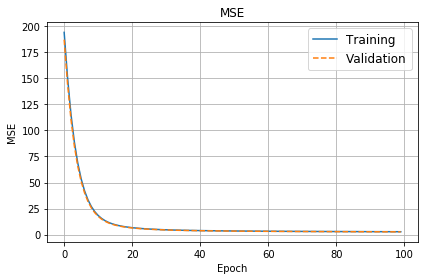

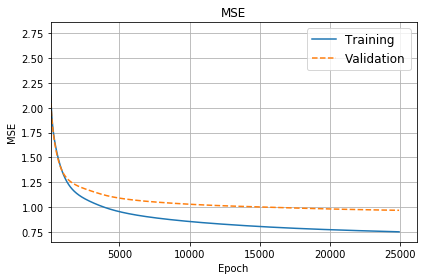

In [10]:
param = {
            "n_layer_units": [50], # con questo si specifica la topologia da provare
            "learning_rate": 0.01,
            "momentum": 0.9,
            "nesterov": True,
            "sigma": 6,
            #"kernel_regularizer": 0.0001,
            "activation": "sigmoid",
            #"early_stop": EarlyStopping(0.00009, 20),
            "max_epoch": 25000
}
model = MLPRegressor(X_train.shape[1], Y_train.shape[1], random_state = 42, verbose = 0, **param)
model.fit(X_train, Y_train, X_val, Y_val)

outputNet = model.predict(X_train)
printMSE(outputNet, Y_train, type = "train")

outputNet = model.predict(X_val)
printMSE(outputNet, Y_val, type = "val")

plotCup(model.get_history())
plotCupCutUnder(model.get_history())
plotCupCut(model.get_history())

# MONK

In [9]:
print("Load Monk DataSet")
X_train, Y_train = load_monk("1", "train")
X_test, Y_test = load_monk("1", "test")

Load Monk DataSet


Build the model
Start to Fit:
Build the model
Start to Fit:
Build the model
Start to Fit:
Build the model
Start to Fit:


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


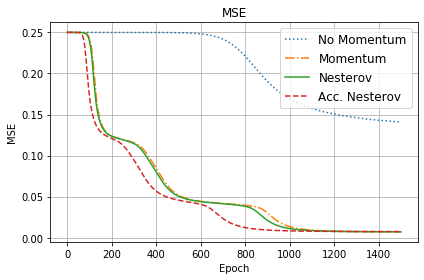

In [64]:
seed = 82
epoch = 1500
np.random.seed(seed=seed)
print("Build the model")
model0 = Mlp()
model0.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
model0.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

model0.set_optimizer( SGD( lr = 0.83, momentum = 0.9, nesterov = True))
# Batch
print("Start to Fit:")
model0.fit(X_train, Y_train, epochs=epoch, validation_data = [X_test, Y_test], verbose=0) 

np.random.seed(seed=seed)
print("Build the model")
model1 = Mlp()
model1.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
model1.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

model1.set_optimizer( SGD( lr = 0.83, momentum = 0.9, nesterov = True, sigma = 8))
# Batch
print("Start to Fit:")
model1.fit(X_train, Y_train, epochs=epoch, validation_data = [X_test, Y_test], verbose=0) 

np.random.seed(seed=seed)
print("Build the model")
model2 = Mlp()
model2.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
model2.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

model2.set_optimizer( SGD( lr = 0.83, momentum = 0.9))
# Batch
print("Start to Fit:")
model2.fit(X_train, Y_train, epochs=epoch, validation_data = [X_test, Y_test], verbose=0) 

np.random.seed(seed=seed)
print("Build the model")
model3 = Mlp()
model3.add(4, input= 17, kernel_initializer = 0.003, kernel_regularizer = 0.001)
model3.add(1, kernel_initializer = 0.003, kernel_regularizer = 0.001)

model3.set_optimizer( SGD( lr = 0.83))
# Batch
print("Start to Fit:")
model3.fit(X_train, Y_train, epochs=epoch, validation_data = [X_test, Y_test], verbose=0) 


plt.plot(model3.history["loss_mse"], linestyle=':')
plt.plot(model2.history["loss_mse"], linestyle='-.')
plt.plot(model0.history["loss_mse"])
plt.plot(model1.history["loss_mse"], linestyle='--')
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['No Momentum','Momentum', 'Nesterov', 'Acc. Nesterov'], loc='upper right', fontsize='large')
plt.tight_layout()
plt.savefig("momentum_img/monk1_4_momentum.eps")
plt.show()